<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [2]:
import pandas as pd
import numpy as np

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

<i>While ages appear to be a little higher on Good credit individuals, there is still much overlap in the middle quartiles.  As such, age on its own is likely not a good predictor of credit worthiness. 
</i>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

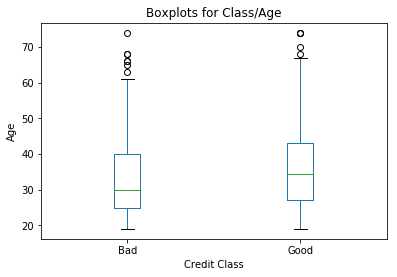

In [14]:
credit_train.boxplot(by="Class",column="Age",grid=0)
plt.suptitle("")
plt.ylabel("Age")
plt.xlabel("Credit Class")
plt.title("Boxplots for Class/Age")
plt.show()


In [20]:
credit_train.groupby(["Class"])["Age"].count()

Class
Bad     246
Good    562
Name: Age, dtype: int64

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

<i> The percentage of people with good credit and a "critical" credit history is about 83% of people, versus about 64% of people with a "critical" credit history of 0.  Given critical credit history, it looks like people would be more likely to have good credit than poor credit.  
</i>

In [56]:
# Command:
q2Data = credit_train.groupby(["CreditHistory.Critical","Class"]).size().reset_index()
q2Data.columns = ["Critical","Worthy","ClassSize"]

q2DataPivot = q2Data.pivot(index="Critical",columns="Worthy",values="ClassSize")
for i in [0,1]:
    q2DataPivot.iloc[i] = q2DataPivot.iloc[i]/(q2DataPivot.iloc[i].sum())
q2DataPivot.head()

Worthy,Bad,Good
Critical,,
0,0.358003,0.641997
1,0.167401,0.832599


<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [16]:
credit_train["Class_Numeric"] = credit_train["Class"].apply(lambda x: 1 if x =="Good" else 0)
credit_test["Class_Numeric"] = credit_test["Class"].apply(lambda x: 1 if x =="Good" else 0)

<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

logit = LogisticRegression()
features = credit_train.columns[1:17]

logit.fit(credit_train[features], credit_train["Class_Numeric"])

print("Confusion matrix:\n"+str(confusion_matrix(credit_train["Class_Numeric"],logit.predict(credit_train[features]))))
print("\nAccuracy:\n"+str(accuracy_score(credit_train["Class_Numeric"],logit.predict(credit_train[features]))))

Confusion matrix:
[[117 129]
 [ 53 509]]

Accuracy:
0.774752475248


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [18]:
print("Confusion matrix:\n"+str(confusion_matrix(credit_test["Class_Numeric"],logit.predict(credit_test[features]))))

Confusion matrix:
[[ 18  36]
 [ 23 115]]


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [19]:
print("Accuracy:\n"+str(accuracy_score(credit_test["Class_Numeric"],logit.predict(credit_test[features]))))

Accuracy:
0.692708333333


<h3>Q.7. Generate the ROC curve.</h3>

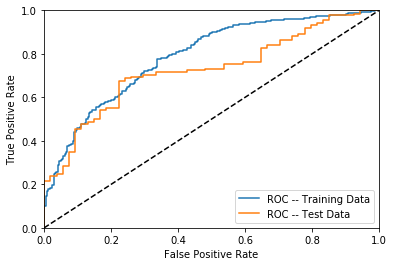

In [59]:
from sklearn.metrics import roc_curve

logit_score_train = logit.predict_proba(credit_train[features])[:,1]
fpr_trn, tpr_trn, _ = roc_curve(credit_train["Class_Numeric"],logit_score_train)

logit_score_test = logit.predict_proba(credit_test[features])[:,1]
fpr_tst, tpr_tst, _ = roc_curve(credit_test["Class_Numeric"],logit_score_test)

plt.plot(fpr_trn,tpr_trn,label="ROC -- Training Data")
plt.plot(fpr_tst,tpr_tst,label="ROC -- Test Data")
plt.plot([0,1],[0,1],c="black",ls="--")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [65]:
from sklearn.metrics import auc
print("AUC on training data:  "+ str(round(auc(fpr_trn,tpr_trn),3)))
print("AUC on test data:  " + str(round(auc(fpr_tst,tpr_tst),3)))

AUC on training data:  0.789
AUC on test data:  0.726


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(credit_train[features],credit_train["Class_Numeric"])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [66]:
print("Confusion matrix on training data:\n"+str(confusion_matrix(credit_train["Class_Numeric"],lda.predict(credit_train[features]))))
print("Accuracy on training data:\n"+str(accuracy_score(credit_train["Class_Numeric"],lda.predict(credit_train[features]))))
print("")
print("Confusion matrix on test data:\n"+str(confusion_matrix(credit_test["Class_Numeric"],lda.predict(credit_test[features]))))
print("Accuracy on test data:\n"+str(accuracy_score(credit_test["Class_Numeric"],lda.predict(credit_test[features]))))


Confusion matrix on training data:
[[124 122]
 [ 59 503]]
Accuracy on training data:
0.77599009901

Confusion matrix on test data:
[[ 18  36]
 [ 24 114]]
Accuracy on test data:
0.6875
